## <font style="color:rgb(50,120,229)">Load the Face and sunglass Images </font>
First of all, we will need the two images:
1. Image of Elon Musk we have been using throughout
1. A png image of a sunglass with an alpha channel

Let us load the images and have a look at them.

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

Sunglass dimension =(136, 314, 4)


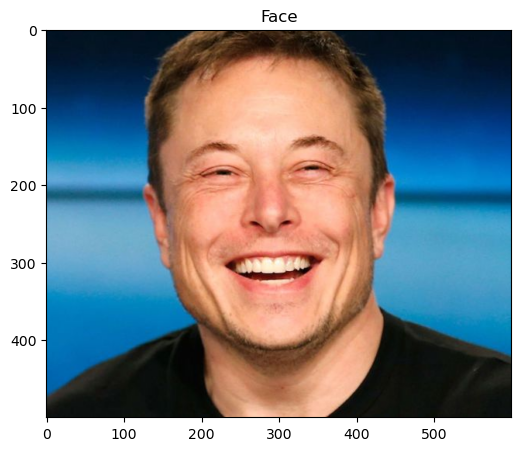

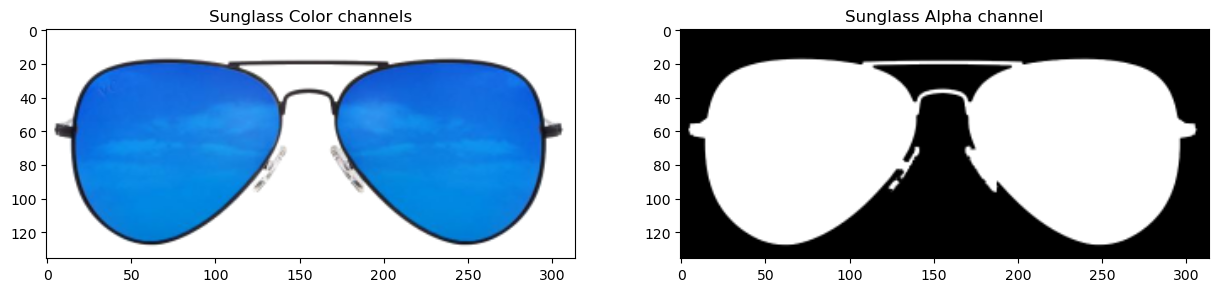

In [3]:
# Load the Face Image
faceImagePath = DATA_PATH + "/images/musk.jpg"
faceImage = cv2.imread(faceImagePath)
faceImage = np.float32(faceImage)/255

plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassimagePath = DATA_PATH + "/images/sunglass.png"
glassPNG = cv2.imread(glassimagePath,-1)
glassPNG = np.float32(glassPNG)/255

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG, None, fx=0.5, fy=0.5)
glassHeight, glassWidth, nChannels = glassPNG.shape
print("Sunglass dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

## <font style="color:rgb(50,120,229)">Find the eye region </font>
By trial and error, we found that if we place the sunglass at location (130,130), it looks about right. 